In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os, sys, h5py, time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sb
import tensorflow as tf
import scipy

import sys
sys.path.append('../../../..')
import mutagenesisfunctions as mf
import bpdev as bd
import helper
from deepomics import neuralnetwork as nn
from deepomics import utils, fit, visualize, saliency

import contacts

from Bio import AlignIO
import time as time
import pandas as pd
np.random.seed(42)

In [8]:
os.chdir('rnnarrays')
arrayfiles = os.listdir('.')
arrayfiles.remove('.DS_Store')
os.chdir('..')

In [9]:
for i,a in enumerate(arrayfiles):
    print (i,a)

0 trna_mlp_marks.npy
1 trna_mlp_varsim_500.npy
2 trna_rnn_marks.npy
3 trna_mlp_varsim_2000.npy
4 trna_rnn_sim_2000.npy
5 trna_mlp_sim_500.npy
6 trna_rnn_marks_log.npy


In [14]:
#get scores
arrayspath = os.path.join('rnnarrays', arrayfiles[4])
hol_mut2 = np.load(arrayspath)
seqlen=71
dims=4

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


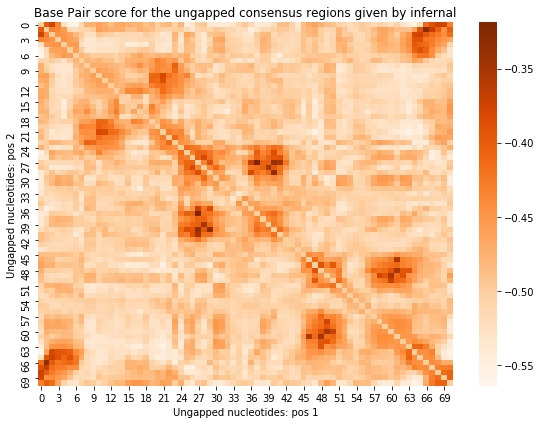

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


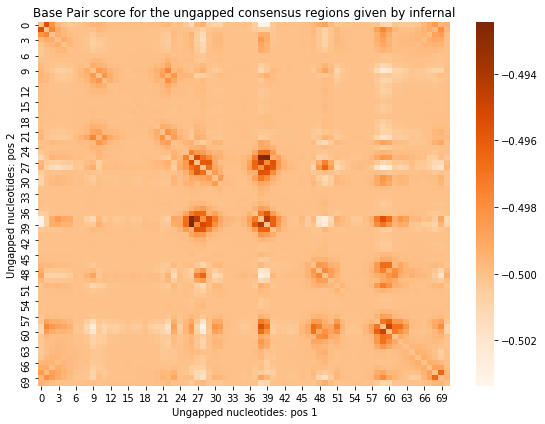

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


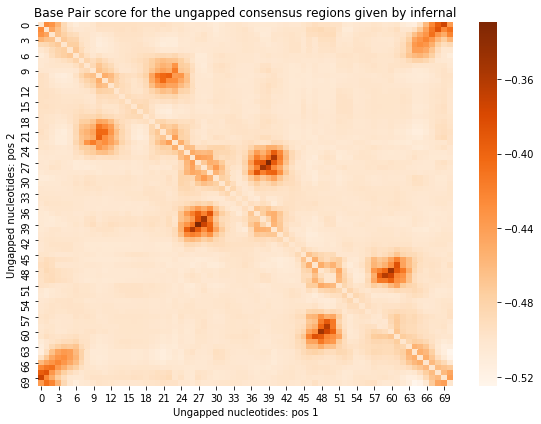

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


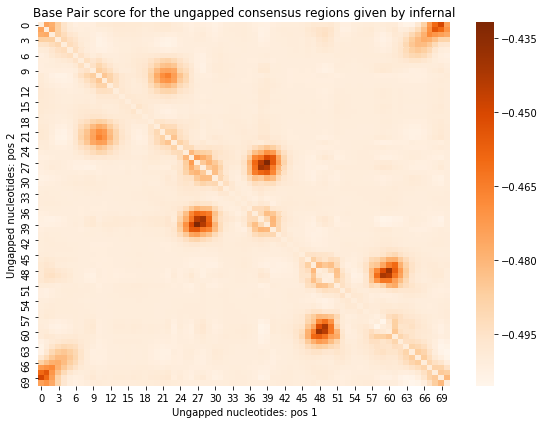

In [17]:
for m in [0,1]:
    for t in [0,1]:
        mutagenesis = hol_mut2[m,t]

        #average the values
        #mean_mut2 = np.nanmean(mutagenesis, axis=0)

        norm_mean_mut2 = mf.normalize_mut_hol(mutagenesis, normfactor=1)

        #Let's try something weird
        bpfilter = np.ones((4,4))*-1
        for i,j in zip(range(4), range(4)):
            bpfilter[i, -(j+1)] = 1.

        #C = np.sum((mean_mut2*bpfilter).reshape(numug,numug,dims*dims), axis=2)
        #norm_mean_mut2= mean_mut2 + np.min(mean_mut2)#np.exp(norm_mean_mut2)  #
        C = np.sum((norm_mean_mut2*bpfilter).reshape(seqlen,seqlen,dims*dims), axis=2)
        #C = C - np.mean(C)
        #C = C/np.max(C)

        color = 'Oranges'

        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        sb.heatmap(C, vmin=None, cmap=color , linewidth=0.00)
        plt.title('Base Pair score for the ungapped consensus regions given by infernal')
        plt.xlabel('Ungapped nucleotides: pos 1')
        plt.ylabel('Ungapped nucleotides: pos 2')
        plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


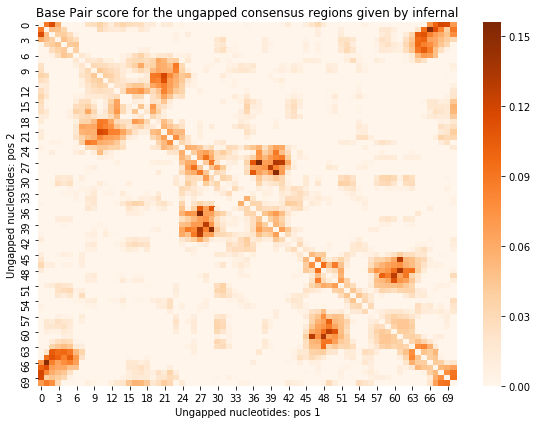

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


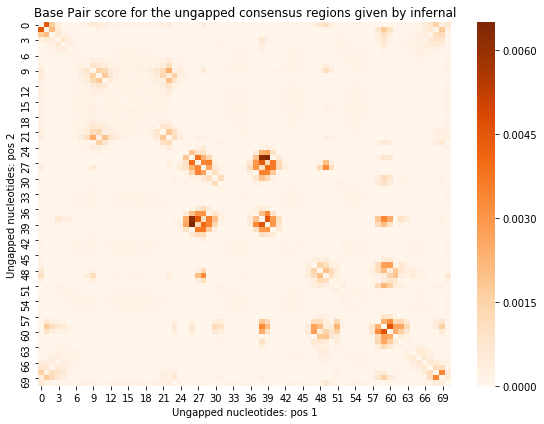

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


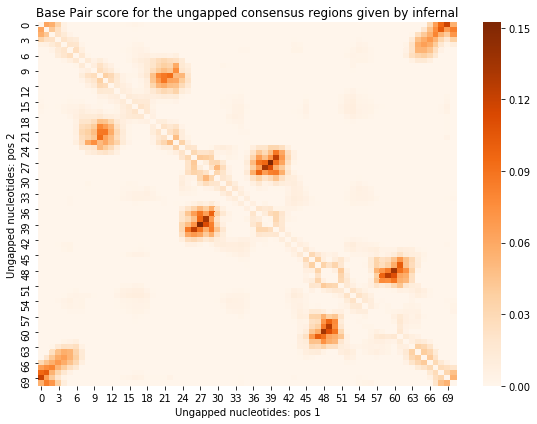

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


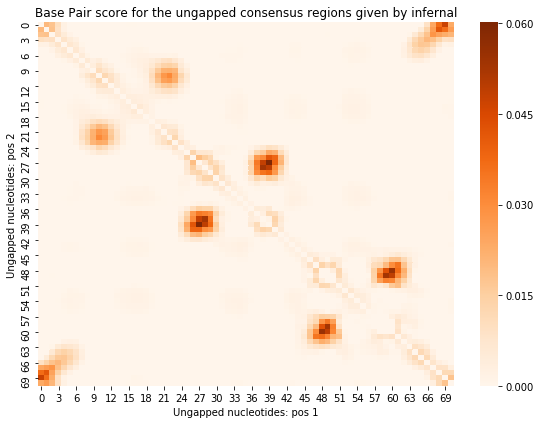

In [19]:
for m in [0,1]:
    for t in [0,1]:
        mutagenesis = hol_mut2[m,t]

        #average the values
        #mean_mut2 = np.nanmean(mutagenesis, axis=0)

        norm_mean_mut2 = mf.normalize_mut_hol(mutagenesis, normfactor=1)

        #Let's try something weird
        bpfilter = np.ones((4,4))*-1
        for i,j in zip(range(4), range(4)):
            bpfilter[i, -(j+1)] = 1.
            
        C = np.sum((norm_mean_mut2*bpfilter).reshape(seqlen,seqlen,dims*dims), axis=2)
        C = bd.APC_hol(C)
        C[np.eye(C.shape[0], dtype=bool)] = 0

        color = 'Oranges'

        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        sb.heatmap(C, vmin=0., cmap=color , linewidth=0.00)
        plt.title('Base Pair score for the ungapped consensus regions given by infernal')
        plt.xlabel('Ungapped nucleotides: pos 1')
        plt.ylabel('Ungapped nucleotides: pos 2')
        plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


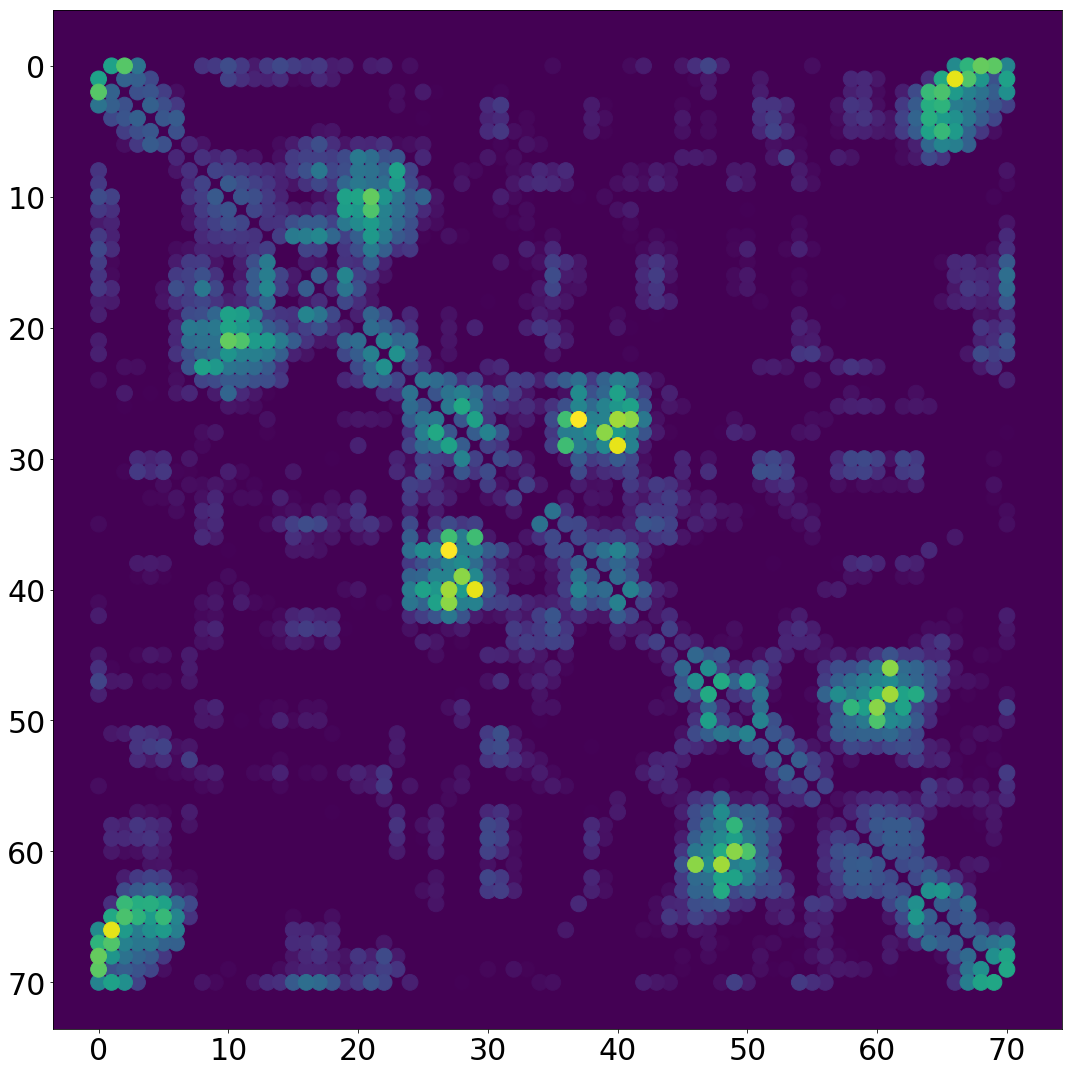

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


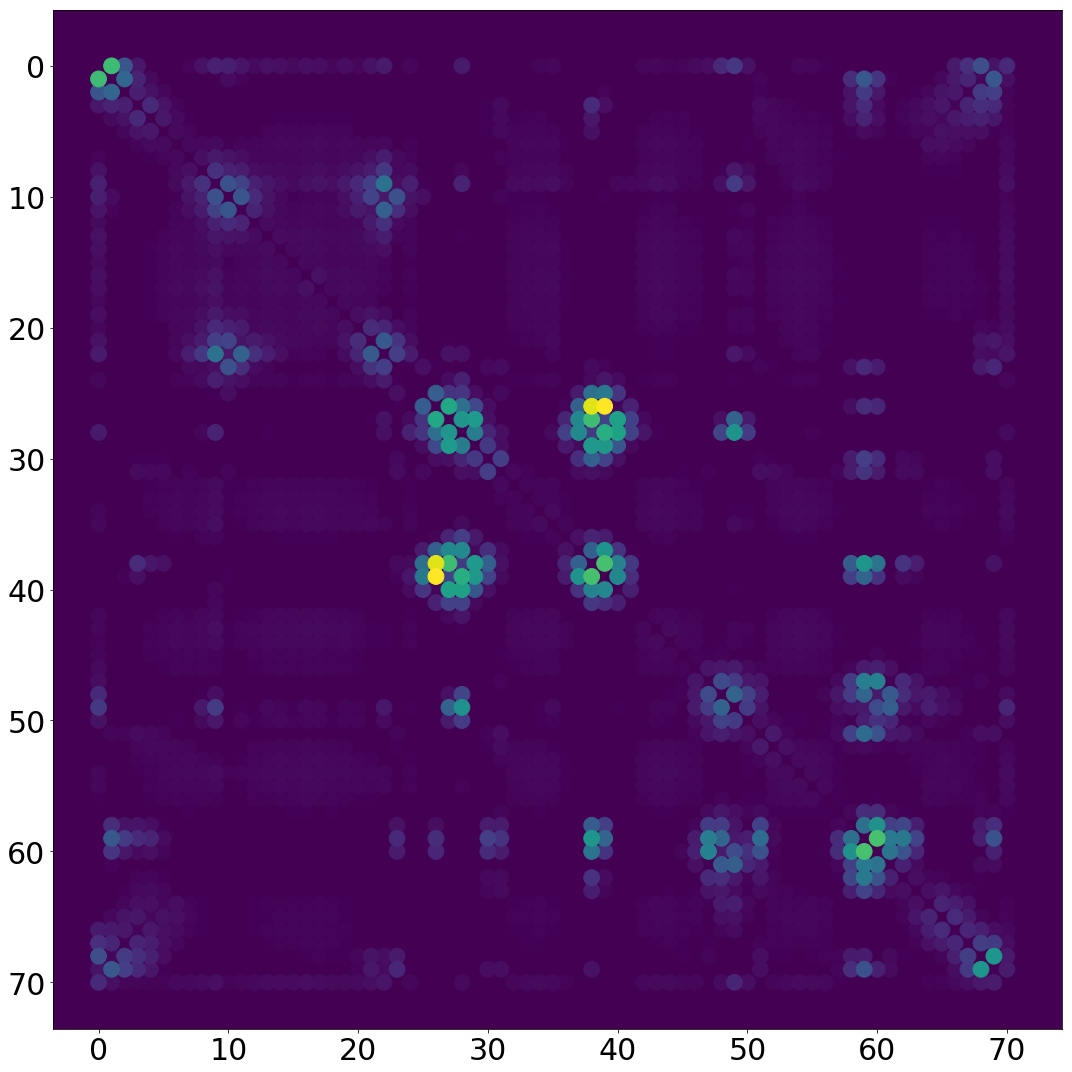

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


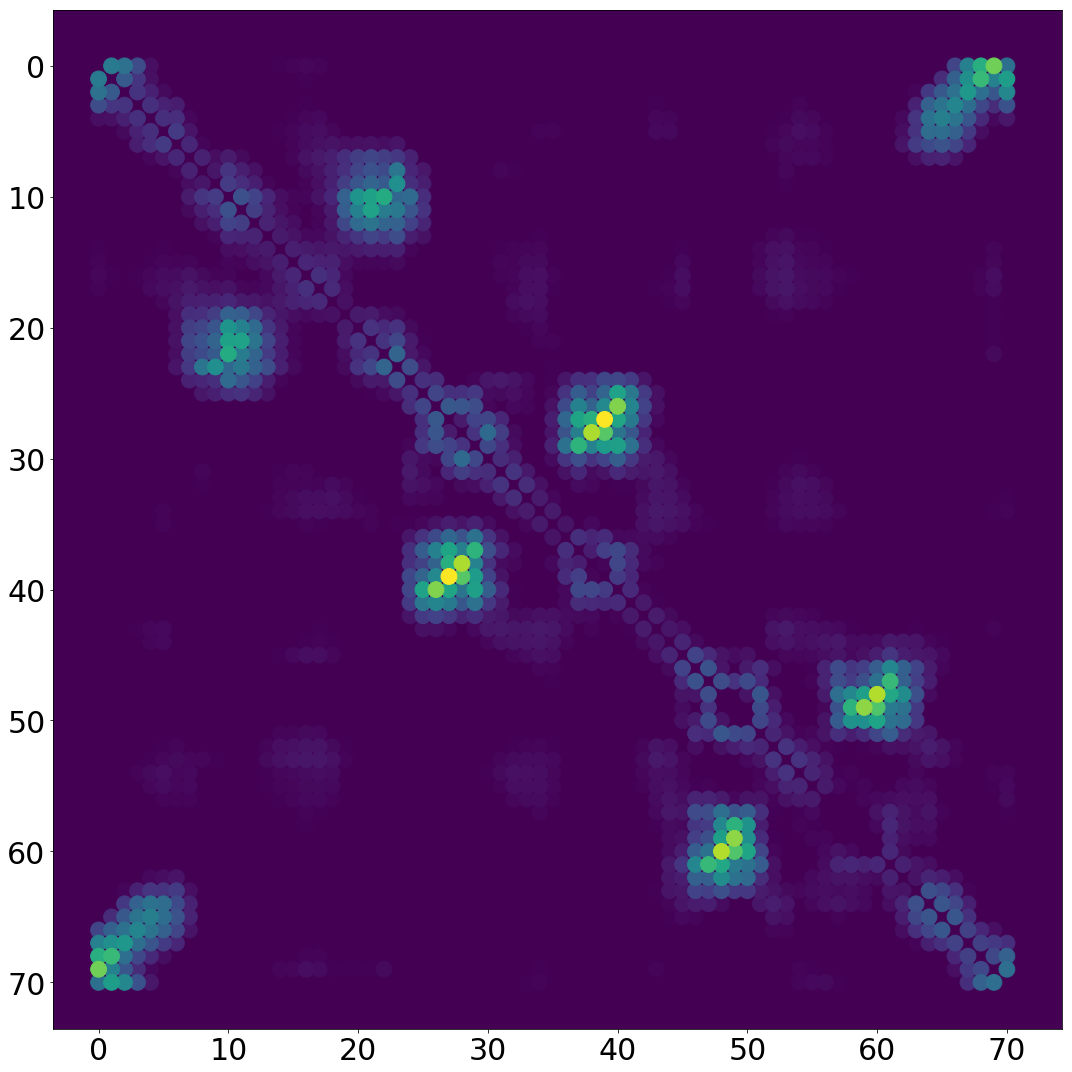

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


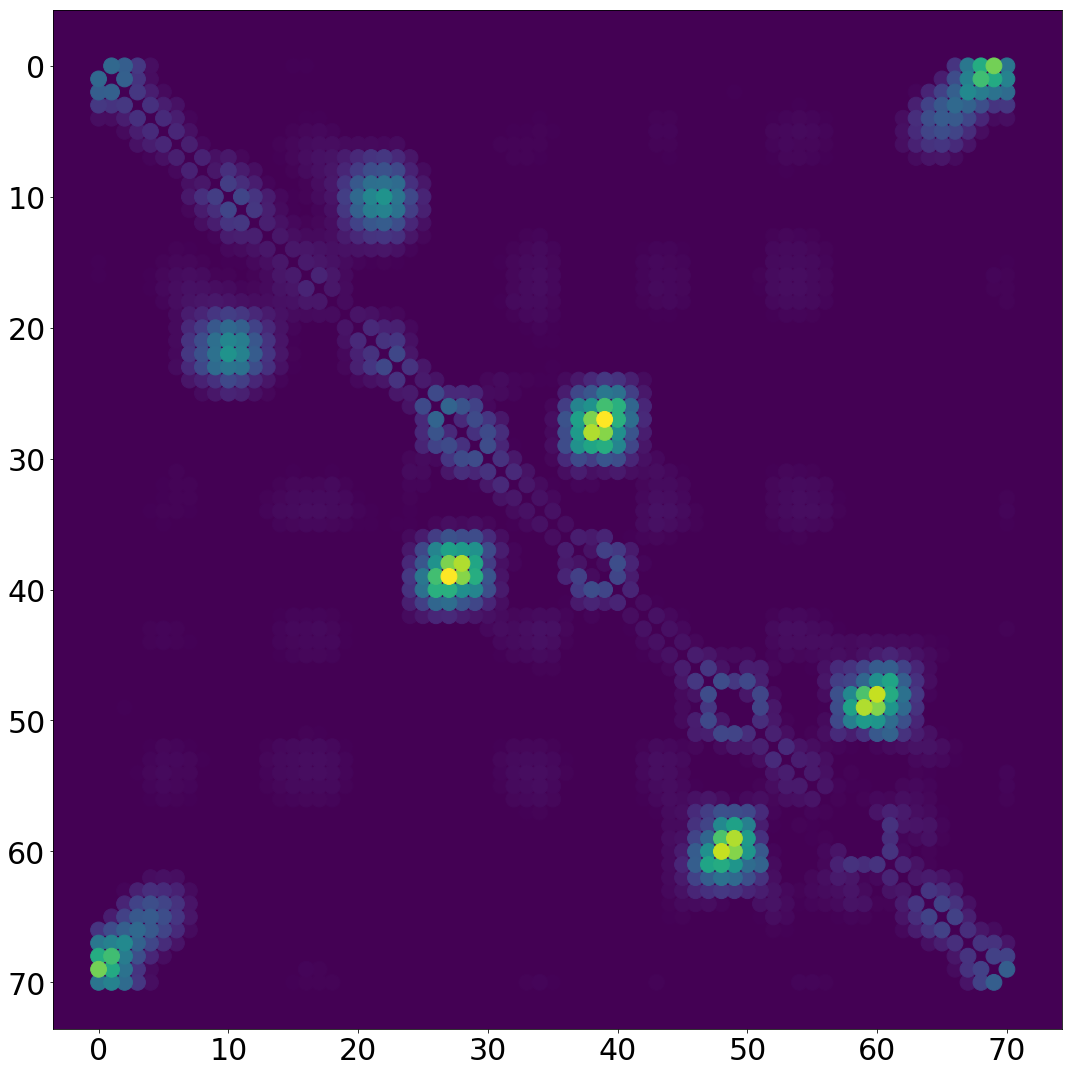

In [23]:
pal='viridis'
cmap = mat.cm.get_cmap(pal)
markersize = 250

for m in [0,1]:
    for t in [0,1]:
        mutagenesis = hol_mut2[m,t]

        #average the values
        #mean_mut2 = np.nanmean(mutagenesis, axis=0)

        norm_mean_mut2 = mf.normalize_mut_hol(mutagenesis, normfactor=1)

        #Let's try something weird
        bpfilter = np.ones((4,4))*-1
        for i,j in zip(range(4), range(4)):
            bpfilter[i, -(j+1)] = 1.
            
        C = np.sum((norm_mean_mut2*bpfilter).reshape(seqlen,seqlen,dims*dims), axis=2)
        C = bd.APC_hol(C)
        C[np.eye(C.shape[0], dtype=bool)] = 0
        
        #get coordinates
        C[np.tril_indices(seqlen)] = np.min(C)
        bp_stretch = np.ravel(C)
        minval = np.sort(bp_stretch)[::-1][-1] #just gets the minimum value - can be changed to a different idx
        bs = np.where(C > minval)
        idx = np.argsort(C[bs])
        x = bs[0][idx] #sorts the x and y coords in order from lowest to highest so highest scores will be plotted last
        y = bs[1][idx]

        score_col = [C[xx,yy] for xx,yy in zip(x,y)]

        color = pal

        plt.figure(figsize=(15,15))
        plt.scatter(x, y, c=score_col, cmap=pal, label = 'SoM', vmin=0., s=markersize)
        plt.scatter(y, x, c=score_col, cmap=pal, label = 'SoM', vmin=0., s=markersize)


        plt.xticks(fontsize=30)
        plt.yticks(fontsize=30)

        ax = plt.gca()
        ax.invert_yaxis()
        ax.set_facecolor(cmap(0.))
        plt.show()
        
    

In [43]:
#get scores
arrayspath = os.path.join('rnnarrays', arrayfiles[4])
hol_mut2 = np.load(arrayspath)

seqlen = 71
dims = 4

try:
    C = bd.get_wc(arrayspath, seqlen, dims, bpugSQ=0, denoise='APC')
except:
    C = get_wc_loc(arrayspath, seqlen, dims, bpugSQ=0, denoise='norm')

#get coordinates
C[np.tril_indices(seqlen)] = np.min(C)
bp_stretch = np.ravel(C)
minval = np.sort(bp_stretch)[::-1][-1] #just gets the minimum value - can be changed to a different idx
bs = np.where(C > minval)
idx = np.argsort(C[bs])
x = bs[0][idx] #sorts the x and y coords in order from lowest to highest so highest scores will be plotted last
y = bs[1][idx]

score_col = [C[xx,yy] for xx,yy in zip(x,y)] #gets the scores for each coordinate in the needed order




/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


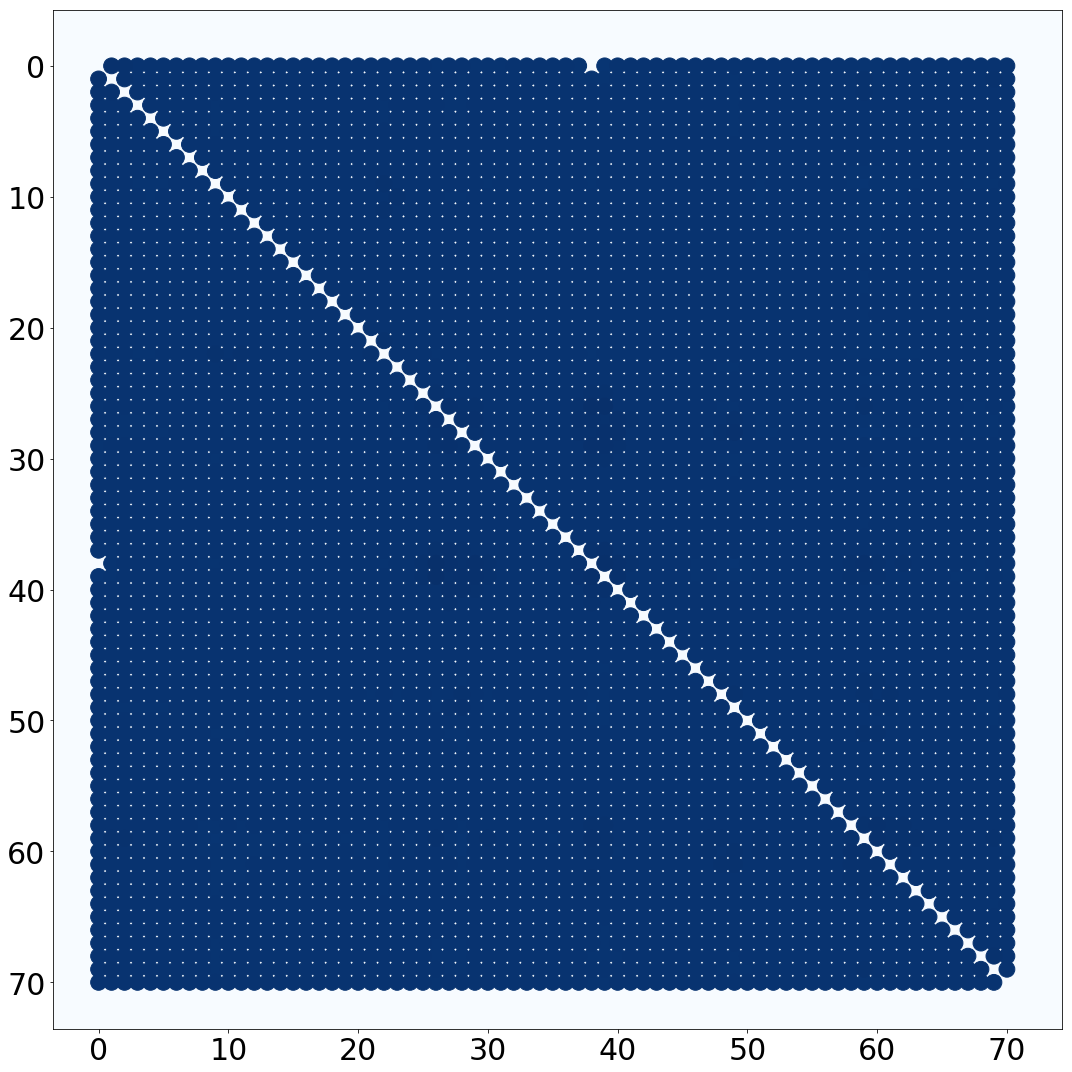

In [44]:
#plot
pal='Blues'
cmap = mat.cm.get_cmap(pal)
markersize = 250

fig = plt.figure(figsize=(15,15))
plt.scatter(x, y, c=score_col, cmap=pal, label = 'SoM', vmin=0., s=markersize)
plt.scatter(y, x, c=score_col, cmap=pal, label = 'SoM', vmin=0., s=markersize)
#plt.title('%s: SoM vs. all WC contacts'%('trna'), fontsize=30)
#plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1., 0.5))
#plt.xlabel('Sequence Position', fontsize=30)
#plt.ylabel('Sequence Position', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

ax = plt.gca()
ax.invert_yaxis()
ax.set_facecolor(cmap(0.))

#plt.savefig('%s.png'%(fam))
plt.show()